@author: Octavio Gutiérrez de Código Máquina

URL del canal: https://www.youtube.com/CodigoMaquina

URL del video: https://youtu.be/kw1h4pns1eY

# Desviación Absoluta de la Mediana

Desviación Absoluta de la Mediana: 22,817.32 Desviación estándar: 29,769.18
Desviación Absoluta de la Mediana: 23,135.16 Desviación estándar: 49,259.20


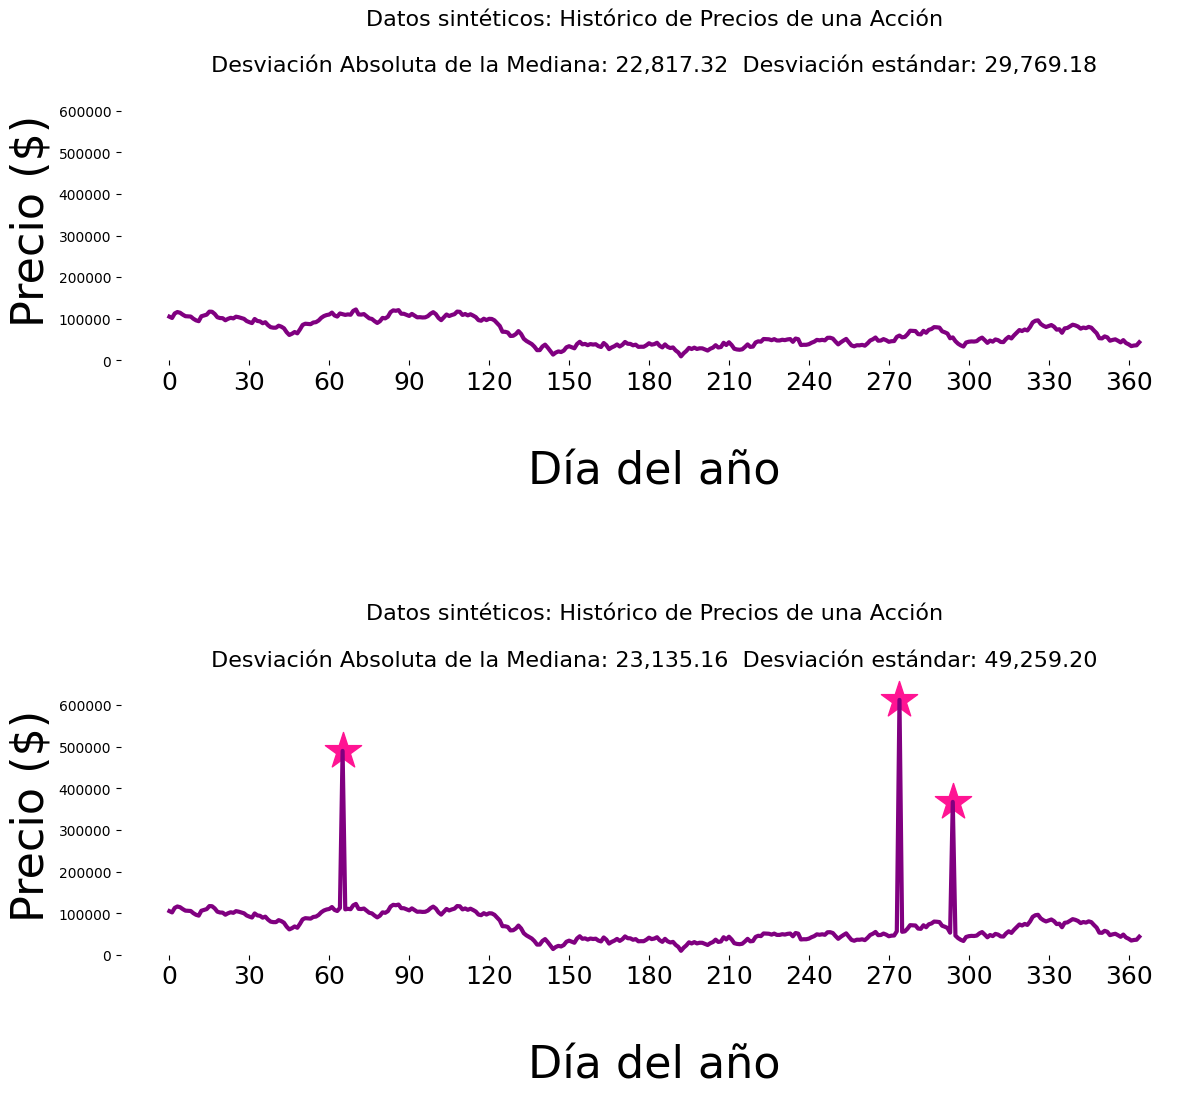

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import median_abs_deviation

# Generación de datos sintéticos del precio de una acción durante un año
precio_inicial = 100000
cambios_diarios = np.random.normal(0, 5000, 365)
historico_precios = precio_inicial + np.cumsum(cambios_diarios)
historico_precios[historico_precios < 0] = 0

# Inclusión de 3 días atípicos arbitrarios a partir del máximo
maximo = historico_precios.max()
dias_atipicos = np.array([(random.randint(0, 364), maximo*3),
                          (random.randint(0, 364), maximo*4),
                          (random.randint(0, 364), maximo*5)])

# Graficando los datos con y sin días atípicos
fig, axes = plt.subplots(2, 1, figsize=(14, 13))

# Cálculo de medidas de dispersión sin días atípicos
mad = median_abs_deviation(historico_precios)
std_dev = historico_precios.std()

# Subfigura 1: Histórico de precios sin días atípicos
print(f"Desviación Absoluta de la Mediana: {mad:,.2f} Desviación estándar: {std_dev:,.2f}")
axes[0].plot(historico_precios, color="purple", linewidth=3)
axes[0].set_title("Datos sintéticos: Histórico de Precios de una Acción\n\n" +
          f" Desviación Absoluta de la Mediana: {mad:,.2f} "+
          f" Desviación estándar: {std_dev:,.2f} ",
          fontsize=16)
axes[0].set_xlabel("\nDía del año", fontsize=32)
axes[0].set_ylabel("Precio ($)", fontsize=32)
axes[0].set_ylim(0, dias_atipicos.T[1].max()*1.1)
axes[0].set_xticks(range(0, 365, 30))
axes[0].set_xticklabels(range(0, 365, 30), fontsize=18)
axes[0].set_yticks(range(0, int(dias_atipicos.T[1].max()), 100000))
axes[0].ticklabel_format(style="plain", axis="y")

# Quitando el marco de subfigura 1
for spine in axes[0].spines.values():
    spine.set_visible(False)

# Agregando días atípicos al histórico de precios
historico_precios[dias_atipicos[0][0].astype("int")] = dias_atipicos[0][1]
historico_precios[dias_atipicos[1][0].astype("int")] = dias_atipicos[1][1]
historico_precios[dias_atipicos[2][0].astype("int")] = dias_atipicos[2][1]

# Cálculo de medidas de dispersión con días atípicos
mad = median_abs_deviation(historico_precios)
std_dev = historico_precios.std()

# Subfigura 2: Histórico de precios con  días atípicos
print(f"Desviación Absoluta de la Mediana: {mad:,.2f} Desviación estándar: {std_dev:,.2f}")
axes[1].plot(historico_precios, color="purple", linewidth=3)
axes[1].scatter(dias_atipicos.T[0], dias_atipicos.T[1],
                marker="*", s=750, color="deeppink")
axes[1].set_title("Datos sintéticos: Histórico de Precios de una Acción\n\n" +
                  f" Desviación Absoluta de la Mediana: {mad:,.2f} "+
                  f" Desviación estándar: {std_dev:,.2f} ",
                  fontsize=16)
axes[1].set_xlabel("\nDía del año", fontsize=32)
axes[1].set_ylabel("Precio ($)", fontsize=32)
axes[1].set_ylim(0, dias_atipicos.T[1].max()*1.1)
axes[1].set_xticks(range(0, 365, 30))
axes[1].set_xticklabels(range(0, 365, 30), fontsize=18)
axes[1].set_yticks(range(0, int(dias_atipicos.T[1].max()), 100000))
axes[1].ticklabel_format(style="plain", axis="y")

# Quitando el marco de subfigura 2
for spine in axes[1].spines.values():
    spine.set_visible(False)

plt.tight_layout(pad=8.0)
#plt.savefig("datos_sintéticos.png", dpi=300, transparent=True)
plt.show()